In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Datasets\BAJAJFINSV.csv")
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:

date = df.set_index('Date')
date.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [5]:
date.isna().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [6]:
dataframe = date.drop(columns=['Trades'], axis=1)

In [7]:
dataframe.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

#### Plotting the target variable VWAP over time

<Axes: >

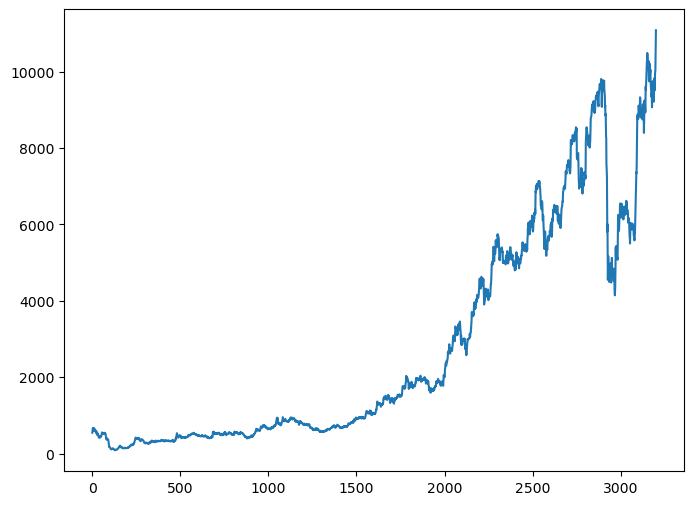

In [8]:
df['VWAP'].plot(figsize= (8,6))

<Axes: xlabel='VWAP', ylabel='Count'>

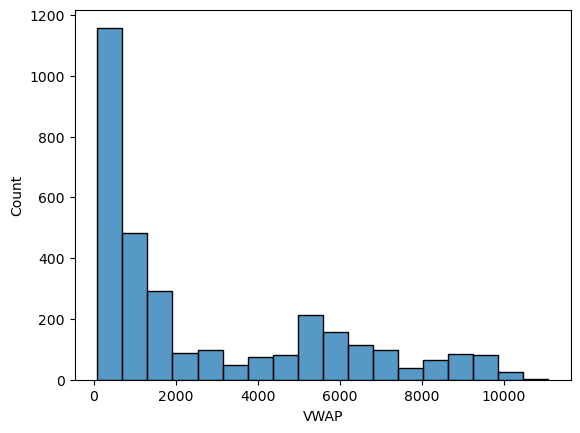

In [9]:
sns.histplot(data = dataframe, x='VWAP')

<Axes: xlabel='VWAP', ylabel='Density'>

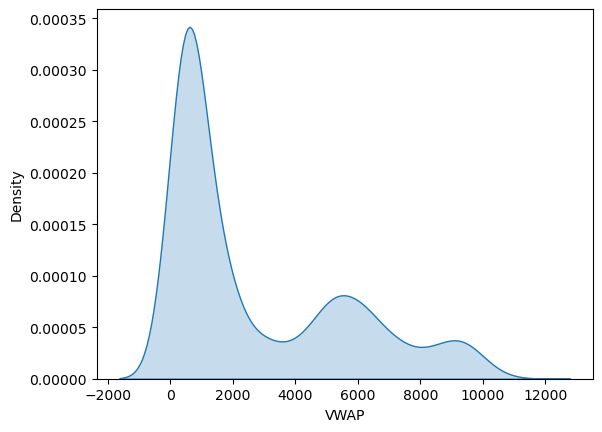

In [10]:
sns.kdeplot(data=dataframe, x= "VWAP", fill=True)

### so u can observe here some kind of Seasonality

In [11]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
from scipy import stats

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([   89.26,    93.99,    94.79, ..., 10486.75, 10980.4 , 11081.78])),
 (2583.5304104028073, 2761.156954076851, 0.8981685068494001))

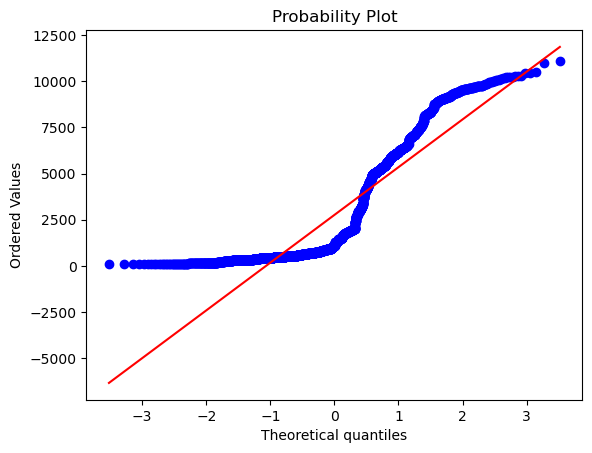

In [13]:
stats.probplot(x= dataframe['VWAP'], plot=plt)

In [14]:
cols = ['Open', 'High', 'Low', 'Close']

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

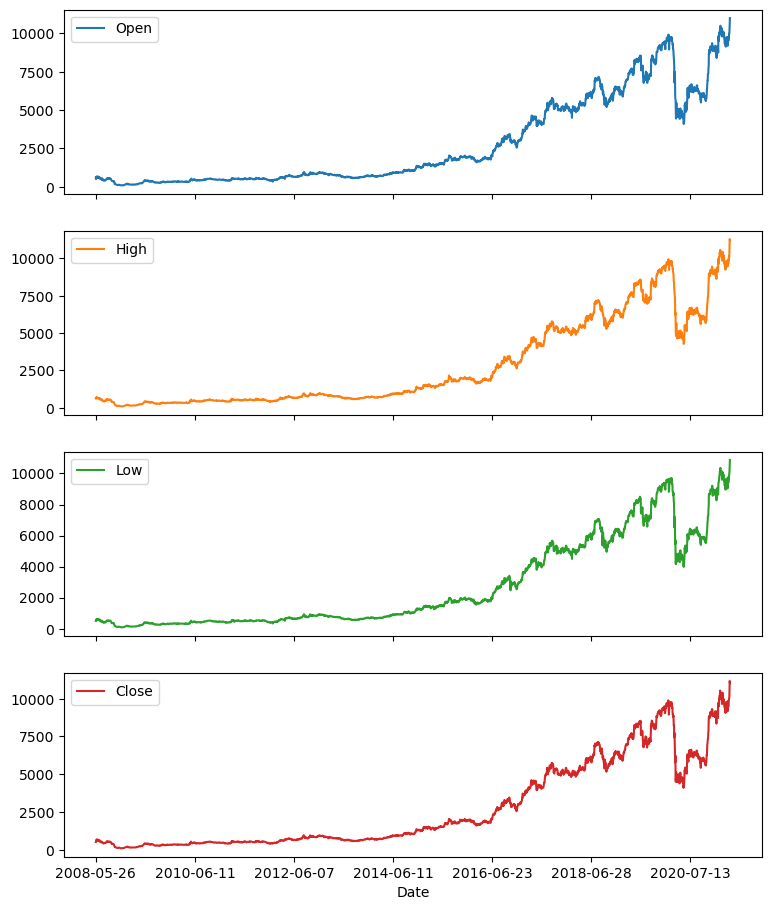

In [15]:
dataframe[cols].plot(figsize= (9,11),subplots=True)

In [16]:
import plotly.graph_objects as go

In [17]:
## Candlestick/OHLC plot
go.Figure(data= [go.Candlestick(x=dataframe.index[0:50], open= dataframe['Open'][0:50], high= dataframe['High'][0:50],close= dataframe['Close'][0:50], low= dataframe['Low'][0:50] )])

In [ ]:
data[['Open', 'High', 'Low', 'Close']].corr()

NameError: name 'data' is not defined

In [19]:
## Feature Engineering
dataframe['Close'][0:10]

Date
2008-05-26    509.10
2008-05-27    554.65
2008-05-28    640.95
2008-05-29    632.40
2008-05-30    644.00
2008-06-02    686.95
2008-06-03    672.05
2008-06-04    598.95
2008-06-05    631.85
2008-06-06    630.90
Name: Close, dtype: float64

In [20]:
lag_features = ['High', 'Low', 'Volume', 'Turnover']

window1 = 3
window2 = 7

In [21]:
date["High"].rolling(window = 3).mean()

Date
2008-05-26             NaN
2008-05-27             NaN
2008-05-28      631.850000
2008-05-29      659.850000
2008-05-30      678.866667
                  ...     
2021-04-26    10059.766667
2021-04-27    10133.466667
2021-04-28    10291.316667
2021-04-29    10682.983333
2021-04-30    11046.983333
Name: High, Length: 3201, dtype: float64

In [22]:
for col in lag_features:
    dataframe[col+"rolling_mean_3"] = dataframe[col].rolling(window= window1).mean()
    dataframe[col+"rolling_mean_7"] = dataframe[col].rolling(window= window2).mean()

In [23]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7'],
      dtype='object')

In [24]:
for col in lag_features:
    dataframe[col+"rolling_std_3"] = dataframe[col].rolling(window= window1).std()
    dataframe[col+"rolling_std_7"] = dataframe[col].rolling(window= window2).std()

In [25]:
dataframe.shape

(3201, 29)

In [40]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [29]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 22.1 MB/s eta 0:00:00


In [30]:
import pmdarima

In [32]:
dataframe.shape

(3201, 29)

In [35]:
training_data=date[0:2400]
test_data=date[2400:]

In [36]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-24,BAJAJFINSV,EQ,5014.60,5015.00,5072.80,4949.00,5040.00,5014.45,5009.95,88003,4.408903e+13,11711.0,35315,0.4013
2018-01-25,BAJAJFINSV,EQ,5014.45,5025.00,5070.00,4900.00,4903.10,4933.05,4994.40,149077,7.445505e+13,16221.0,68755,0.4612
2018-01-29,BAJAJFINSV,EQ,4933.05,4949.50,5010.00,4899.00,4902.50,4912.40,4945.65,100404,4.965626e+13,10109.0,50151,0.4995


In [37]:
from pmdarima import auto_arima

In [44]:
import pmdarima
pmdarima.__version__

## 1.7.1
## U can encounter different pmdarima version !

'2.0.4'

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

In [ ]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

##  model.fit(y=training_data['VWAP'] , exogenous= training_data[ind_features])

In [62]:
# doing Forecast

forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

## forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [63]:
forecast

array([6367.45081598, 6394.34074152, 6532.75490041, 6604.61367737,
       6640.66794668, 6569.28843533, 6232.70243116, 6096.23902104,
       5960.27424948, 6083.6219814 , 6063.93791919, 6090.34168979,
       5970.69902507, 5857.70656456, 5754.51418301, 5555.67643312,
       5394.77731372, 5317.70461953, 5531.06978053, 5668.02171329,
       5812.67847594, 5775.66337492, 5758.8059842 , 5627.70167407,
       5524.2626592 , 5377.41753602, 5256.54659685, 5250.86865361,
       5283.7276813 , 5346.0112591 , 5388.10023427, 5396.78848294,
       5382.19580947, 5353.83359499, 5448.19222442, 5528.49341852,
       5586.85760085, 5607.06242578, 5636.1596772 , 5653.27277244,
       5647.18926659, 5627.40966248, 5613.54297282, 5652.90367881,
       5679.04564249, 5697.71042698, 5752.53529633, 5804.14613365,
       5817.57061358, 5829.22974558, 5834.17327109, 5906.26233363,
       5993.44965959, 6038.88405493, 6053.59269661, 6009.33899675,
       5919.1643179 , 5785.49930674, 5678.80301518, 5687.76426

In [64]:
test_data['Forecast_ARIMA']= forecast

In [65]:
test_data['Forecast_ARIMA']

Date
2018-09-11    6367.450816
2018-09-12    6394.340742
2018-09-14    6532.754900
2018-09-17    6604.613677
2018-09-18    6640.667947
                 ...     
2020-08-25    6429.722562
2020-08-26    6629.722885
2020-08-27    6655.671280
2020-08-28    6643.782224
2020-08-31    6512.257847
Name: Forecast_ARIMA, Length: 485, dtype: float64

<AxesSubplot:xlabel='Date'>

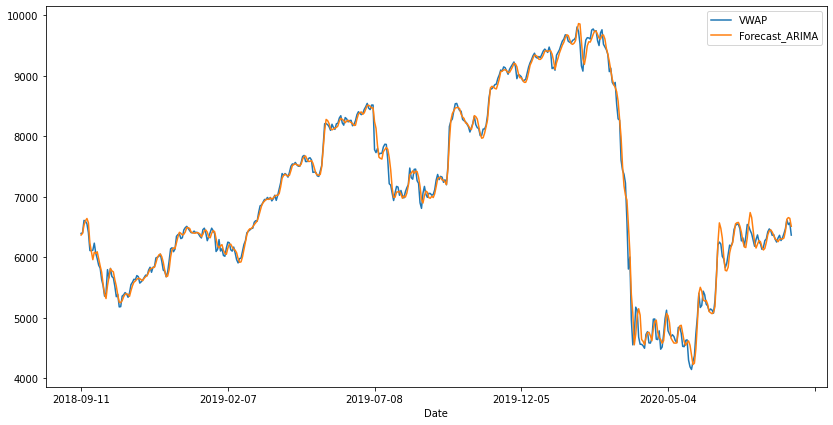

In [66]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

#### The Auto ARIMA model seems to do a fairly good job in predicting the stock price

#### Checking Accuracy of our model

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

120.21182040924319

In [37]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

79.96180280266465